## Анализ причин выжимаемости на Титанике

В качестве первого домашнего задания Вам предстоит сформулировать и проверить гипотезы о причинах выживаемости на Титанике. Необходимые данные можно найти на [GitHub](https://github.com/aleksei-riabykh/sberbank_data_analysis_06_07_21/tree/master/data/titanic) курса, описание к данным на сайте соревнований по анализу данных [Kaggle](https://www.kaggle.com/c/titanic/data). 

Критерии оценивания:
* Четко сформулированы гипотезы и выводы из них
* Гипотез не меньше 3-х
* Присутствуют кросс-признаковые гипотезы (например, процент выживаемости среди молодых женщин: пол + возраст)
* Использованы группировки `.groupby()` с агрегированием `.aggregate()`, трансформацией `.transform()` или фильтрацией  `.filter()` данных
* Присутствует визуализация
* Присутствует общий вывод исследования

## Шаблон исследования

In [ ]:
import numpy as np
import pandas as pd
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving train.csv to train (1).csv


{'train.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\r\

### Гипотеза 1

__Формулировка__:

Шанс выживаемости зависит от количества знаков в имени.  

Определим длину интервалов по формуле Стерджеса.

In [ ]:
def calculate_len_intervail(df_, col_to_use, col_to_create):
    '''Считаем длинну имени и сохраняем в качестве новой feature'''
    df = df_.copy() # создаем копию, чтобы не вносить изменения в оригинальнй df
    df[col_to_create] = df[col_to_use].apply(lambda x: len(x))

    return sturges_denominator(df, col_to_create)

def sturges_denominator(df, col_to_create):
    '''Вычисляем знаменатель формулы Стерджеса - это количество интервалов'''
    stur_denom = round(1 + math.log(len(df[col_to_create]), 2))   # количество
    return create_interval(df, col_to_create, stur_denom)         # интервалов

def create_interval(df, col_to_create, stur_denom):
    '''
    Создаем интервалы c помощью вычисленного по формуле Стерджеса
    количества интервалов и pd.cut
    '''
    sr = pd.cut(df[col_to_create], stur_denom)
    df[f'{sr.name}_grp'] = sr#.astype(str)
    return df, stur_denom

df_train = pd.read_csv('./train.csv', sep=',')

%time df, stur_denom = calculate_len_intervail(df_train, 'Name', 'Name_len')

df.head()

CPU times: user 4.6 ms, sys: 0 ns, total: 4.6 ms
Wall time: 4.61 ms


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Name_len_grp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,"(18.364, 24.727]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,"(50.182, 56.545]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,"(18.364, 24.727]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,"(43.818, 50.182]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,"(18.364, 24.727]"


In [ ]:
grp = df.groupby(['Name_len_grp'])
grp.groups

{(11.93, 18.364]: [5, 36, 46, 55, 56, 69, 74, 76, 94, 99, 108, 128, 129, 135, 139, 152, 157, 163, 169, 178, 181, 188, 209, 210, 219, 236, 258, 260, 262, 264, 265, 278, 280, 294, 295, 296, 301, 314, 320, 321, 330, 335, 349, 352, 354, 360, 363, 382, 387, 398, 400, 401, 405, 409, 410, 411, 422, 428, 438, 441, 455, 462, 464, 468, 470, 471, 499, 500, 509, 511, 514, 517, 521, 522, 524, 525, 527, 531, 543, 554, 555, 561, 563, 569, 570, 573, 593, 598, 606, 613, 622, 634, 635, 643, 646, 648, 650, 661, 663, 665, ...], (18.364, 24.727]: [0, 2, 4, 6, 11, 16, 19, 20, 21, 26, 29, 30, 32, 33, 34, 37, 42, 45, 48, 57, 60, 61, 63, 64, 65, 67, 72, 75, 77, 79, 80, 83, 84, 86, 89, 90, 93, 100, 105, 107, 109, 111, 112, 113, 114, 115, 116, 118, 122, 123, 126, 130, 138, 141, 143, 154, 158, 160, 168, 171, 174, 175, 179, 185, 189, 190, 191, 195, 196, 201, 203, 204, 212, 214, 215, 216, 218, 221, 222, 223, 229, 231, 239, 240, 244, 250, 253, 257, 263, 267, 269, 270, 273, 285, 286, 287, 288, 289, 292, 293, ...], (2

In [ ]:
df_hip_1 = df.groupby(['Name_len_grp'])['Survived'].aggregate([
        sum, len, lambda x: sum(x)/len(x) #доля выживших в группе
])
df_hip_1

,sum,len,<lambda_0>
Name_len_grp,,,
"(11.93, 18.364]",30,140.0,0.214286
"(18.364, 24.727]",78,263.0,0.296578
"(24.727, 31.091]",107,296.0,0.361486
"(31.091, 37.455]",44,77.0,0.571429
"(37.455, 43.818]",24,43.0,0.558140
"(43.818, 50.182]",39,47.0,0.829787
"(50.182, 56.545]",15,19.0,0.789474
"(56.545, 62.909]",2,3.0,0.666667
"(62.909, 69.273]",2,2.0,1.000000


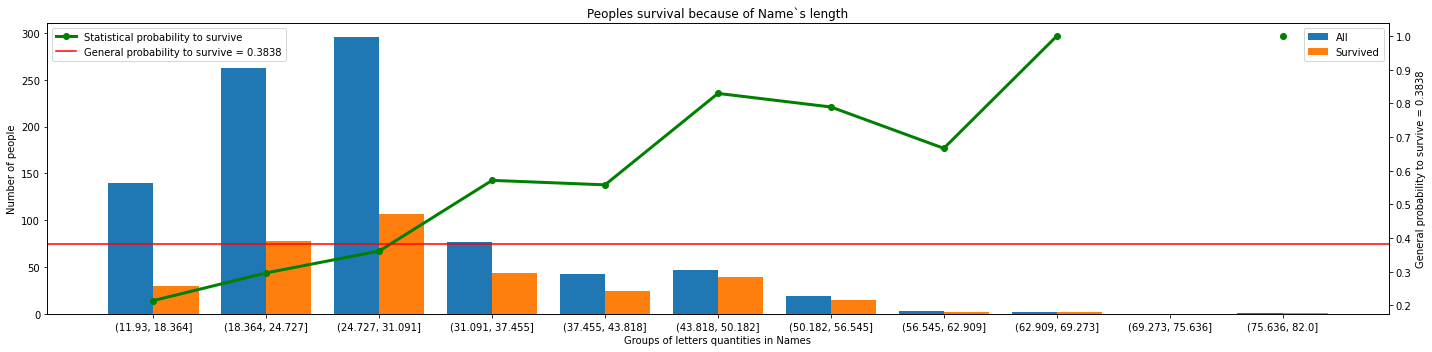

In [ ]:
labels = df_hip_1.index.to_list()
general_surv = df['Survived'].aggregate(lambda x: sum(x) / len(x))

width = 0.4

x = np.arange(len(labels))

fig, ax = plt.subplots(1, figsize=(20, 5))

rects1 = ax.bar(x - width/2, df_hip_1['len'], width, label='All')
rects2 = ax.bar(x + width/2, df_hip_1['sum'], width, label='Survived')

ax.set_ylabel('Number of people')
ax.set_xlabel('Groups of letters quantities in Names')
ax.set_title('Peoples survival because of Name`s length')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax_01 = ax.twinx()
rects3 = ax_01.plot(
    x, df_hip_1['<lambda_0>'], 
    linewidth=3, color='green', marker='o', 
    label='Statistical probability to survive'
)

ax_01.axhline(
    y=general_surv, color='red', 
    label=f'General probability to survive = {round(general_surv, 4)}'
)

ax_01.set_ylabel(f'General probability to survive = {round(general_surv, 4)}')
ax_01.legend()

fig.tight_layout()

plt.show()

__Вывод__:

Наблюдается рост шанса на выживаемость при длинне имени более 31 знака. Имеет место снижение шанса при диапазоне длины имени от 56 до 63 знаков, но даже в этом случае процент выживаемости составляет более 66%, что превышает 38% показатель генеральной совокупности. При этом необходимо учесть, что объемы выборки по некоторым диапазонам кране малы, а следовательно, скорее всего, не репрезентативны.

###  Гипотеза 2

__Формулировка__:

Выживание зависит от стоимости билета и пола.  

In [ ]:
df_hip_2, stur_denom_02 = sturges_denominator(df_train, 'Fare')
print('Кол-во групп =', stur_denom_02,)
df_hip_2.head(1)

Кол-во групп = 11


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_grp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,"(-0.512, 46.575]"


In [ ]:
# удалим лишнее столбцы
df_hip_2 = df_hip_2.filter(['Survived', 'Pclass', 'Sex', 'Fare', 'Fare_grp'])
# сформируем новый столбец, для учета числа людей
df_hip_2['One'] = [1 for _ in range(df_hip_2.shape[0])]
df_hip_2.head(2)

,Survived,Pclass,Sex,Fare,Fare_grp,One
0,0,3,male,7.2500,"(-0.512, 46.575]",1
1,1,1,female,71.2833,"(46.575, 93.151]",1


In [ ]:
# группируем данные по интетесующим показателям и выводим агрегированные значения
df_hip_2_ = df_hip_2_.groupby(['Sex', 'Fare_grp'])[
        ['Survived', 'Pclass', 'One']
    ].aggregate({'Survived': sum, 'One': sum, 'Pclass': np.mean})

df_hip_2_['Prob_to_surv'] = df_hip_2_['Survived'] / df_hip_2_['One']

# делим полученный DF на два - с данными женщин и мужчин
df_hip_2_f = df_hip_2_.loc['female'].sort_index()
df_hip_2_m = df_hip_2_.loc['male']
df_hip_2_f

,Survived,One,Pclass,Prob_to_surv
Fare_grp,,,,
"(-0.512, 46.575]",149,223,2.578475,0.668161
"(139.726, 186.302]",7,9,1.000000,0.777778
"(186.302, 232.877]",6,6,1.000000,1.000000
"(232.877, 279.452]",5,5,1.000000,1.000000
"(46.575, 93.151]",50,55,1.218182,0.909091
"(465.754, 512.329]",1,1,1.000000,1.000000
"(93.151, 139.726]",15,15,1.000000,1.000000


In [ ]:
# рисуем в plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio
from plotly.subplots import make_subplots

In [ ]:
width = 0.4
ind = np.arange(df_hip_2_f.shape[0])
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])

fig.add_trace(go.Bar(
        x=ind - width/2, y=df_hip_2_m['Prob_to_surv'], name='male'
    ), row=1, col=1
)
fig.add_trace(go.Bar(
    x=ind + width/2, y=df_hip_2_f['Prob_to_surv'], name='female'
    ), row=1, col=1
)
fig.add_trace(go.Scatter(
        x=ind - width/2, y=df_hip_2_f['One'], mode='markers', 
        marker_size=10, marker_color='purple', name='Number of female'
    ), row=1, col=1, secondary_y=True
)
fig.add_trace(go.Scatter(
        x=ind + width/2, y=df_hip_2_m['One'], mode='markers', 
        marker_size=10, marker_color='dark blue', name='Number of male'
    ), row=1, col=1, secondary_y=True
)

fig.update_xaxes(
    title_text='Ranges of Tickets fare groups',
    ticktext = df_hip_2_f.index.to_list()
)

fig.update_yaxes(
    title_text='Probability of survival',
    tickprefix='p = ', secondary_y=False
)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = ind,
        ticktext = df_hip_2_f.index.to_list()
    )
)

fig.show()

__Вывод__:

В ходе анализа установлено:
- мжчины с ультрадешевыми билетами (до 46,5 долларов) практически не имели шансов на выживание (р=0,165), то есть 6 из 7 мужчин погибли. У женщин шансы выше (р=0,66), выжила 2 из 3.
- с билетами от 46,5 до 93,2 ситуация выправляется. У женщин шанс на выживание 91%, у мужчин 33% (что ниже шанса на выживание в целом по генеральной совокупности 38%).
- Женщины с более дорогими биллетами спасались в большинстве случаев, при этом мужчины продолжали жертвовать собой, не смотря на свое состояние. Исключение - пассажиры с самыми дорогими биллетами, среди которых погибших нет.

Вывод следующий: при наступлении катастроф погибают бедняки, у богатых больше шансов выжить. При этом у женщин шансы на выживание выше, чем мужчин, но все равно наблюдается зависимость от стоимости билета. 

### Гипотеза 3
 
__Формулировка__:

Шанс выживания зависит от номера билета (наличие только цифр или цифры + прочие знаки), а также буквенного номера Cabin.

In [ ]:
df_copy = df_train.copy()

# Создаем столбец для подсчета пассажиров в разных группах
df_copy['One'] = [1 for _ in range(df_train.shape[0])]

# Создаем столбец, с указанием первой буквы Ticket. Для NaN будет n. 
# Cab_fl = Cabin firs letter
func_0 = lambda x: str(x)[0]
df_copy['Cab_fl'] = df_copy['Cabin'].transform(func_0)

# Создаем столбец для выделения билетов только с цифровыми номерами == True.
# TwDo = Ticket with Digits only
func_1 = lambda x: False if re.search(r'\D', str(x)) != None else True
df_copy['TwDo'] = df_copy['Ticket'].transform(func_1)

# Создаем столбец с количеством выживших пассажиров с общими признаками:
# одинаковая первая буква Cabin и содержит/не содержит Ticket нецифровые символы
# C_T - кол-во выживших пассажиров с одинаковыми признаками билетов и кабин
# C_T_all - кол-во всех пассажиров, относящихся к общим признакам
# Surv_prob - вероятность выживания в группе Cab_fl и TwDo
df_copy['C_T'] = df_copy.groupby(['Cab_fl', 'TwDo'])['Survived'].transform(sum)
df_copy['C_T_all'] = df_copy.groupby(['Cab_fl', 'TwDo'])['One'].transform(sum)
df_copy['Surv_prob'] = df_copy['C_T'] / df_copy['C_T_all']

df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,One,Cab_fl,TwDo,C_T,C_T_all,Surv_prob
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,n,False,50,176,0.284091
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,False,9,15,0.600000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,n,False,50,176,0.284091
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,True,26,44,0.590909
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,n,True,156,511,0.305284


In [ ]:
# Получаем сгруппированный DF, используя np.mean, 
# чтобы вычислить интересующие значения
grp_03 = df_copy.groupby(['Cab_fl', 'TwDo']).aggregate([np.mean])
grp_03.reset_index(level=['TwDo'], inplace=True)

# удаляем многоуровневые названия колонок
grp_03.columns = [tup[0] if tup[0] else tup[1] for tup in grp_03.columns]
grp_03

,TwDo,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,One,C_T,C_T_all,Surv_prob
Cab_fl,,,,,,,,,,,,
A,False,521.666667,0.333333,1.000000,50.333333,0.333333,0.000000,47.359733,1,1,3,0.333333
A,True,419.083333,0.500000,1.000000,43.000000,0.083333,0.166667,37.689925,1,6,12,0.500000
B,False,451.000000,0.687500,1.000000,36.066667,0.437500,0.625000,178.513275,1,11,16,0.687500
B,True,558.354839,0.774194,1.000000,34.400000,0.322581,0.548387,79.953500,1,24,31,0.774194
C,False,418.533333,0.600000,1.000000,35.500000,0.333333,0.200000,127.460553,1,9,15,0.600000
C,True,402.318182,0.590909,1.000000,36.308649,0.750000,0.568182,90.841382,1,26,44,0.590909
D,False,442.857143,0.857143,1.285714,31.714286,0.285714,0.285714,51.373229,1,6,7,0.857143
D,True,484.846154,0.730769,1.076923,41.166667,0.461538,0.307692,58.825323,1,19,26,0.730769
E,False,548.666667,0.777778,1.333333,39.222222,0.222222,0.111111,36.118056,1,7,9,0.777778


In [ ]:
def upfront_prep(df, col_name_01, col_name_02, row_index, triger):
    '''
    Функция извлекает из df строки с triger в столбце col_name_01. 
    Затем добавляет строку с пустыми значениями для корректного 
    отображения информации на графике.
    '''
    df_ = df[df[col_name_01] == triger]
    df_.reset_index(inplace=True)
    sr = pd.Series(
        [0 for _ in range(df_.shape[1])], index=df_.columns.to_list()
    )
    df_ = df_.append(sr, ignore_index=True)
    row_ = df_.shape[0] - 1
    df_.at[row_, col_name_01] = triger
    df_.at[row_, col_name_02] = row_index
    df_[col_name_01] = df_[col_name_01].astype('bool')
    df_.loc[row_ - 1], df_.loc[row_] = df_.loc[row_], df_.loc[row_ - 1]
    df_.set_index(col_name_02, inplace=True)

    return df_

df_f = upfront_prep(grp_03, 'TwDo', 'Cab_fl', 'T', 0)
df_t = grp_03[grp_03['TwDo'] == True]

general_surv = df_train['Survived'].sum() / df_train.shape[0]

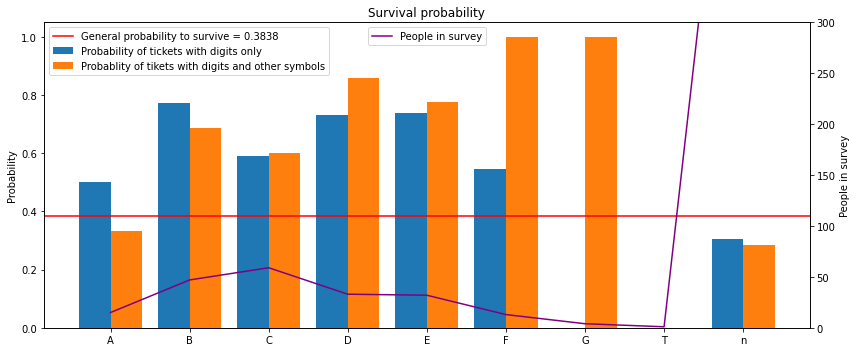

In [ ]:
width = 0.4

ind_f = np.arange(df_f.shape[0])
ind_t = np.arange(df_t.shape[0])

fig, ax = plt.subplots(1, figsize=(12, 5))

rects1 = ax.bar(
    ind_t - width/2, df_t['Surv_prob'], width, 
    label='Probability of tickets with digits only'
)
rects2 = ax.bar(
    ind_f + width/2, df_f['Surv_prob'], width, 
    label='Probablity of tikets with digits and other symbols'
)
ax.axhline(
    y=general_surv, color='red', 
    label=f'General probability to survive = {round(general_surv, 4)}'
)

ax.set_ylabel('Probability')
ax.set_title('Survival probability')
ax.set_xticks(ind_t)
ax.set_xticklabels(df_t.index.to_list())
ax.legend()

ax_01 = ax.twinx()
#ax_01.set_yscale('log')
ax_01.set_ylim([0, 300])
ax_01.set_ylabel('People in survey')
rects3 = ax_01.plot(
    ind_t, df_t['C_T_all'] + df_f['C_T_all'], 
    color='purple', label='People in survey'
)

ax_01.legend(loc='upper center')

fig.tight_layout()

plt.show()

__Вывод__:

### Вывод исследования:

  

Глядя на график можно сделать выводы:
- пассажирам в Cabin, начинающимися на литеры A и B, для повышения вероятности  выживания необходимо было иметь Ticket только с цифровыми номерами. 
- в Cabin с литерами C-F выжило больше пассажиров с билетами, имеющими не только тцифры в номерах Ticket. 
- Cabin G и T не показательны, потому что в них было мало пассажиров.
- Пассажиры без Cabin (литера n) имели меньше всего шансов на выживание. Статистическая вероятность выживания у них ниже вероятности выживания генеральной совокупности. При этом необходимо отметить, что пассажиры с только цифровыми Ticket имели больше шансов на выживание.

Таким образом лучше было иметь Ticket не только с цифрами, если покупать билет в Cabin с литерами C-F. Если же литера Cabin A-B, то Ticket лучше только с цифрами. Без Cabin на Tintanic лучше не плыть, или для любителей риска Ticket только с цифрами повышает шанс на выживание на 2%.